## Data Mining
### Data Cleaning
It is not uncommon for the data obtained to be of poor quality and difficult to work with. This may include the presence of missing values, outliers, or spelling mistakes, which are particularly prevalent in user-generated data.


### Feature Extraction
Machine learning algorithms require the given data to be in certain numerical formats. In this step it is necessary to transform the data into the needed format to allow further processing. Additionally this allows the machine learning algorithm to receive a more effective set of inputs, which increases accuracy and lowers the computational need for machine learning algorithms. 

#### Over- and Underfitting

<center>

<img src="images/overUnderfitting.png" title="Over- and Under-fitting" width="500">

<i> A common problem when working with a machine learning algorithm to create a model that discoveres patterns in unknown data. On the left is Underfitting, when the model is too simple to capture the complexity of the data. In the middle is the desired outcome of a data model. On the right is the example of Overfitting which occurs when a machine learning algorithms detects noise as data. Figure from [Anup Bhande, 2018](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76). 
</i>

</center>


### Feature Selection
Feature selection is a critical part in data mining due to numerous reasons. As only relevant features are being considered, the dimensionality of the data set is reduced and is more efficient, accurate and less prone to overfitting. Furthermore less features lead to a better understanding of the learning result.
The following figure explains the Hughes phenomenon, where a higher amount of features deteriorates the model's performance. Additional features may introduce noise, which lead to a decrease in classification accuracy ([Hughes,1968](#references)). 

<center>

<img src="images/hughesScreen.png" title="hughes" width="300">

<i>Hughes phenomenon, a increase of number of features decreases the accuracy of the classification model. Figure from [Weinmann(2019)](http://www.eurosdr.net/sites/default/files/images/inline/05-2019-12-04_presentation_pcp_workshop_weinmann.pdf).  </i>

</center>

There are three notable categories of feature selection. 
Filter-based methods that include statistical tests to assess the correlation between various features. These filters for example remove features with low variance, since they are deemed to have little information. Because they are classifier-independent, simple and efficient they are often used. Alternativley Wrapper-based methods or Embedded methods can be used ([Weinmann, 2016](#references)).

### Model Selection 
Two overarching themes emerge when selecting a model: supervised and unsupervised learning models.
 Supervised machine learning includes classification which is heavily used in image recognition. Example of classification models that categorize data into labels, are Decision Trees, Support Vector Machines and k-Nearest Neighbors. 
Supervised learning also includes regression models which describes a functions that models the correlation of a independent variable and a target variable. The correlation of systolic blood pressure and amount of coffee a person drinks is a example of a linear regression. 

In unsupervised classification the algorithm tries to assign each data point to a cluster. The number of clusters to be extracted depends on the algorithm. In the case of kMeans, the user must input the desired number of clusters. Alternatively, in the case of DBSCAN, the user must definde the distance between two points to form a new cluster.
These algorithms work without training labels, so the user has to understand the output clusters. 

Deep learning as the machine learning algorithm called representation learning harvest the benefit, of the algorithm which learns the features from the data itself. The algorithm is then capable of representing the data in a way that eases classification or regression ([E-Trainee](https://3dgeo-heidelberg.github.io/etrainee/module3/05_pointcloud_machine_learning/05_pointcloud_machine_learning.html)).

### Model training
Models are prone to be overfitted when too many features are selected, sufficient data not being available to train the model or if the data is noisy. This noise may easily be detected as a pattern by the model. 
In order to detect overfitting the data set is split into a training and a validation set. After training, the model is presented the validation set and the perfomance is tracked. If they diverge, then it can be concluded that the model is overfitting. To tackle underfitting additonal features can be selected, the complexity of the model can be raised or a increase of duration of training the model ([Scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)).


### Model evaluation
To evaluate the model there are various methodlogies that may be applied. For regression Mean Absolute Error or Mean Squared Error are often applied. To evaluate a classification model one can calculate the Accuracy which is the proprotion of correctly classified instances. Furthermore, the Precision, that measures the quality of positive predictions, Recall, the ability of the classifier to find all the positive samples, and the F1-score, which is the Harmonic mean of precision and recall, illustrate various metrics to evaluate a classifier ([Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html)) ([Christopher D. Manning et. al., 2009](#references)).


## Geospatial data analysis
In the following we showcase a typical workflow for classification that involves first having a point cloud that can be exapnded by co-registration. Then neighborhood selection, followed by feature extraction and feature selection. Lastly we choose our classification model.  

### Co-registration 

When working with point cloud data there may be two acquisitions from the same structure, therefore it is benefical to apply Co-registration to combine the multiple point clouds of interest. Typical algorithms include iterative closest point alogrithm or feature based matching algorithms. 
<center>
<img src="images/coRegistration.png" title="co-Registration of two Point clouds" width="400">

<i>Co-registration of two point clouds, showing the Arc de triomphe from different angles. Here a feature based matching algorithm, along the corners of the building, might be more computationaly efficient. Figure from [thinkautomonous](https://www.thinkautonomous.ai/blog/point-cloud-registration). </i>

</center>

As can be seen in this image, with two point clouds of the Arc de triomphe in Paris, the co-registrated point cloud has more information about the subject of interest. Often co-registration is conducted to detect changes in the area, for example after natural disasters or after longer periods of time to show change in the scanned area.

The following code provided by [E-Trainee](https://3dgeo-heidelberg.github.io/etrainee/module3/05_pointcloud_machine_learning/05_pointcloud_machine_learning.html) shows code to read las files with additional functionality and then registers two point-clouds from the hellstugubrean glacier. They are then shown with the python module polyscope.


In [1]:
# import required modules
import laspy # import the laspy package for handling point cloud files
import numpy as np # import numpy for array handling

def read_las(infile,get_attributes=False,use_every=1):
    """
    Function to read coordinates and optionally attribute information of point cloud data from las/laz file.

    :param infile: specification of input file (format: las or laz)
    :param get_attributes: if True, will return all attributes in file, otherwise will only return coordinates (default is False)
    :param use_every: value specifies every n-th point to use from input, i.e. simple subsampling (default is 1, i.e. returning every point)
    :return: Array of point coordinates of shape (N,3) with N number of points in input file (or subsampled by 'use_every')
    """

    # read the file using the laspy read function
    indata = laspy.read(infile)

    # get the coordinates (XYZ) and stack them in a 3D array
    coords = np.vstack((indata.x, indata.y, indata.z)).transpose()

    # subsample the point cloud, if use_every = 1 will remain the full point cloud data
    coords = coords[::use_every, :]

    # read attributes if get_attributes is set to True
    if get_attributes == True:
        # get all attribute names in the las file as list
        las_fields= list(indata.points.point_format.dimension_names)

        # create a dictionary to store attributes
        attributes = {}

        # loop over all available fields in the las point cloud data
        for las_field in las_fields[3:]: # skip the first three fields, which contain coordinate information (X,Y,Z)
            attribute = np.array(indata.points[las_field]) # transpose shape to (N,1) to fit coordinates array
            if np.sum(attribute)==0: # if field contains only 0, it is empty
                continue
            # add the attribute to the dictionary with the name (las_field) as key
            attributes[las_field] = attribute[::use_every] # subsample by use_every, corresponding to point coordinates

        # return coordinates and attribute data
        return coords, attributes

    else: # get_attributes == False
        return coords  # return coordinates only
    
import polyscope as ps

DATA_PATH = '../module3/hellstugubrean'


# check if the specified data path exists
import os
if not os.path.isdir(DATA_PATH):
    print(f'ERROR: {DATA_PATH} does not exist')
    print('Please specify the correct path to the data directory.')

# read data, but only every 100th point (for quick visualisation)
data_2009 = read_las(DATA_PATH + "/hellstugubrean_2009.las", use_every=100, get_attributes=True)
#data_2009 = read_las("/Users/Elaji/seminar/las_files/AK_20140718_mtn_pass_l0s666.las",use_every=100,get_attributes=True)
data_2017 = read_las(DATA_PATH + "/hellstugubrean_2017.las", use_every=100, get_attributes=True)


In [2]:
# data_2009[0] contains the point cloud coordinates.
print("Point cloud coordinates:")
print(data_2009[0])


Point cloud coordinates:
[[4.69999900e+05 6.82657401e+06 1.77105000e+03]
 [4.70007370e+05 6.82659502e+06 1.76738000e+03]
 [4.70018330e+05 6.82660197e+06 1.76351000e+03]
 ...
 [4.71339740e+05 6.82735570e+06 1.79480000e+03]
 [4.71354260e+05 6.82735432e+06 1.80143000e+03]
 [4.71374350e+05 6.82735329e+06 1.81231000e+03]]


In [3]:
# data_2009[1] contains a dictionary of attributes, with each attribute as a key-value pair.
print("attributes:")
print(data_2009[1])

attributes:
{'intensity': array([66, 70, 50, ..., 92, 86, 77], dtype=uint16), 'return_number': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8), 'number_of_returns': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8), 'scan_direction_flag': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8), 'classification': array([2, 2, 2, ..., 2, 2, 2], dtype=uint8), 'scan_angle_rank': array([ 15,  15,  15, ..., -13, -13, -12], dtype=int8), 'user_data': array([32, 32, 32, ..., 32, 32, 32], dtype=uint8), 'gps_time': array([554530.19669945, 554530.56046898, 554530.74381859, ...,
       555550.13834984, 555550.22947533, 555550.36616356])}


In [ ]:
# start up polyscope
# ps.init() (uncomment this line)
pc_2009 = ps.register_point_cloud("point cloud 2009", data_2009[0])
# for the ALS(Airborne Laser Scanning) point cloud, add the Intensity as a scalar value
pc_2009.add_scalar_quantity('Intensity', data_2009[1]["intensity"])
# pc_2017 = ps.register_point_cloud("point cloud 2017", data_2017[0])
# for the DIM(Discrete Imaging Mode) point cloud, add RGB attributes. We need to provide them as a Nx3 array, so we stack red, green and blue together.
# furthermore, they need to be values between 0 and 1, but are "unsigned integer with 16 bit", i.e. values between 0 and 65535.
# pc_2017.add_color_quantity('RGB', np.array([data_2017[1]["red"], data_2017[1]["green"], data_2017[1]["blue"]]).T / 65535)
ps.set_up_dir("z_up")
# ps.show() (uncomment this line, to work with it locally)

<center>
<img src="images/screenshot_000001.png" title="the hellstugubrean glacier scans layered on top of eachother" width="700">

<i>

Visualized with polyscope showing the two glacier point clouds in the same coordinate system. The point cloud from 2009 showing the intensity is colored in blue and the same glacier from 2017 colored in yellow. Figure by author.
</i>
</center>

The previous figure illustrates how Co-registration is a vital procedure when working with point-cloud data. [E-Trainee](https://3dgeo-heidelberg.github.io/etrainee/module3/05_pointcloud_machine_learning/05_pointcloud_machine_learning.html) notes that the difference in height between the two point clouds, which can be seen most clearly in the centre of the image, is due to a "significan[t] loss of mass from the glacier over these 8 years". 


### Neighborhood selection 
Calculations based on neighborhoods are among the most important ones, to gain additional information.
They are necessary for any filtering, smoothing or interpolation step and for information extraction. 

Spatial neighborhoods are defined either by a certain distance to other points or to a certain amount of fixed neighbors [Weinmann et al., 2015](#references).
If a fixed distance is given, and the height can be neglected, the neighborhoods is commonly referred to as a cylindrical neighborhood. Otherwise if its 3D then they are called spherical neighborhoods because their height is also relevant. 
A point cloud neighborhood can also be defined by the fixed amount of neighbors. Fixed neighbors are also commonly called k-nearest neighbors and the size can be highly variable depending on the point density at that area [E-Trainee](https://3dgeo-heidelberg.github.io/etrainee/module3/01_pointcloud_principles/01_pointcloud_principles.html).

<center>
<img src="images/cylindrical.png" height="300" /> <img src="images/kNN.png"  height="300"/> 

<i>

Spatial and k-nearest neighbor neighborhoods shown side by side. Figures by [E-Trainee](https://3dgeo-heidelberg.github.io/etrainee/module3/01_pointcloud_principles/01_pointcloud_principles.html
).
</i>
</center>

In [30]:
# The following code provides a example to create a neighborhood with the fixed amount of neighbors of 6.
from scipy.spatial import KDTree
tree = KDTree(data_2009[0])
neighbors_distance, neighbors_indices = tree.query(data_2009[0], k=6)
print("neighbors_indices: ")
print(neighbors_indices)
print()
print("neighbors_distance:")
print(neighbors_distance)

neighbors_indices: 
[[    0    90  1756   832  1849  1014]
 [    1   102   100   482   104   926]
 [    2   106   492   928   493   100]
 ...
 [16946 16932 16279 16293 16278 16947]
 [16947 16295 16934 16282 16294 16279]
 [16948 16935 16296 16933 16280 16934]]
neighbors_distance:
[[ 0.          5.55713055  5.90160995  7.27791866  7.74490155  9.00575927]
 [ 0.          5.3514484   6.58046351  8.26486539  8.77220041 11.04301136]
 [ 0.          2.04614271  6.42173653  8.58764811  8.983752   10.64036184]
 ...
 [ 0.          0.86740994 10.59914619 11.00074997 12.26704936 16.02160104]
 [ 0.          4.67835441  5.26878544  7.2781385   7.69398466 11.16631542]
 [ 0.          6.6315232  12.25912313 16.24979077 16.42639948 18.00639053]]


The next code snippet provided by [laspy](https://laspy.readthedocs.io/en/latest/complete_tutorial.html) has been slightly adjusted for our needs and selects the points which are within a fixed distance from the first point. 

In [31]:
coords = data_2009[0]

# Pull off the first point
first_point = coords[0, :]

# Calculate the Euclidean distance from all points to the first point
distances = np.sqrt(np.sum((coords - first_point) ** 2, axis=1))

# Create an array of indicators for whether or not a point is less than
# 50 units away from the first point
mask = distances < 50

# Grab an array of all points which meet this threshold
coords_kept = coords[mask]

print(f"We kept {len(coords_kept)} points out of {len(coords)} total")



We kept 118 points out of 16949 total



### Feature Extraction
After neighborhoods are defined, various features can be extracted. 3D-features can be calculated by using the eigenvalues of the structure tensor or looking at the geometric properties. Spatial neighborhoods allow the derivation of local surface roughness.
<center>
<img src="images/KitFeatures.png" title="eigenwerte features"  width="500">

<i>A subset of features that can be easily derived from eigenwerte. Figure and more details in [Weinmann (2019)](http://www.eurosdr.net/sites/default/files/images/inline/05-2019-12-04_presentation_pcp_workshop_weinmann.pdf).</i>
</center>




The following code provided by [E-Trainee](https://3dgeo-heidelberg.github.io/etrainee/module3/05_pointcloud_machine_learning/05_pointcloud_machine_learning.html) demonstrates  a feature vector can be created, focusing on extracting features that can be calculated by using eigenwerte. They include planarity, linearity, omnivariance, roughness and slope. These features are calculated using eigenvalues derived from the covariance matrix of neighboring points. There are a multitude of other features that can be extracted [Weinmann (2016)](#references).

In [2]:
def create_feature_vector(neighbour_points):
    # structure tensor
    struct_tensor = np.cov(neighbour_points.T)
    # eigenvalue decomposition
    eigvals, eigvec = np.linalg.eigh(struct_tensor)
    l3, l2, l1 = eigvals

    # find eigenvector to smallest eigenvalue = normal vector to best fitting plane
    normalvector = eigvec[:, 0]
    # flip so that it always points "upwards"
    if normalvector[2] < 0:
        normalvector *= -1

    # feature calculation
    planarity = (l2-l3)/l1
    linearity = (l1-l2)/l1
    omnivariance = (l1*l2*l3)**(1./3)
    roughness = l3
    slope = np.arctan2(np.linalg.norm(normalvector[:2]), normalvector[2])

    return np.array([planarity,
                     linearity,
                     omnivariance,
                     roughness,
                     slope])

The next code block querys the neighbors of each point inside the radius of 4 meters and then calls the function to create a feature vector for each point.

In [5]:
#points_2009 = read_las("../module3/hellstugubrean/hellstugubrean_2009.las")
points_2009 = read_las("/Users/Elaji/seminar/las_files/AK_20140718_mtn_pass_l0s666.las")
from scipy import spatial
print("Building KD tree...")
tree_2009 = spatial.KDTree(points_2009)
print("Querying neighbours...")
neighbours = tree_2009.query_ball_tree(tree_2009, r=1)

feature_array = np.empty((points_2009.shape[0], 5), dtype=np.float32)
print("Calculating features...")
from tqdm import tqdm
for pix, point_neighbours in tqdm(enumerate(neighbours), unit='pts', total=points_2009.shape[0]):
    curr_neighbours = points_2009[point_neighbours]
    curr_features = create_feature_vector(curr_neighbours)
    feature_array[pix, :] = curr_features

Building KD tree...
Querying neighbours...
Calculating features...


  0%|          | 0/7761411 [00:00<?, ?pts/s]/var/folders/32/d8hn503d5glbm6qfn13x0zrw0000gp/T/ipykernel_80301/3722135646.py:3: RuntimeWarning: Degrees of freedom <= 0 for slice
  struct_tensor = np.cov(neighbour_points.T)
  0%|          | 0/7761411 [00:00<?, ?pts/s]


LinAlgError: Eigenvalues did not converge

Lastly we can inspect the feature in a histogram. Here we choose omnivariance vs slope.

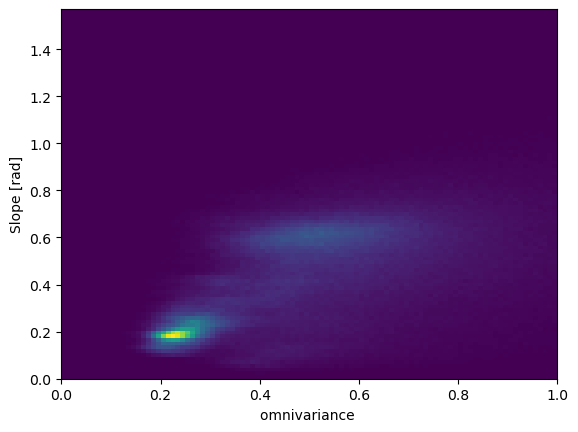

In [ ]:
import matplotlib.pyplot as plt

plt.hist2d(feature_array[:, 2], feature_array[:, 4], bins=100, range=[[0, 1], [0, 3.14/2]])
plt.xlabel("omnivariance ")
plt.ylabel("Slope [rad]")
plt.show()

The heatmap shows indicates that most points are near low values for both the slope and omnivariance. This indicates that most of the terrain or objects in the point cloud are relatively flat and evenly distributed in terms of variance.

##### Ground removal
Ground removal is a important procedure when working with point cloud data. Depending on the specific situation, it might be beneficial or even necessary to remove ground points. Sometimes it is cost-effective to remove them to reduce computing power and time needed to process the data.  
Notable algortihms for this purpose are RANSAC (Random Sample Consensus), Ground Plane Fitting and Patchwork++. 
<center>
<img src="images/groundRemoval.png" alt="ground removal" title="different algorithms for ground removal" width="500">

<i>Showcasing different ground removal algorithms and Patchwork++ being shown as least prone to under-segmentation (blue area). _Green_: True Positive _Blue_: False Negatives _Red_: False Positives. Figure from [Seungjae Lee and Hyungtae Lim and Hyun Myung (2022)](https://arxiv.org/abs/2207.11919).</i>
</center>

The next section demonstrates how the number of ground points can be extracted from the given dataset. For the glacier data, ground removal is underwhelming because a glacier inherently only contains ground points. So for this example we use a dataset we extracted from [G-LiHT](https://glihtdata.gsfc.nasa.gov/). 

If you remember the las files, their specification allows points to be classified to certain values. For example: 
1. Unassigned
2. Ground 
3. Low vegetation 

For more details please look here [specification](https://www.ogc.org/standard/las/) and for visual aid here [arcgis](https://desktop.arcgis.com/en/arcmap/latest/manage-data/las-dataset/lidar-point-classification.html). 

The las files have already ran through a classification pipeline, easing further work on them.
This allows us to filter points just by specifing the classification value which indicates the type of surface the LiDAR pulse has hit. But not all point clouds have all categories classified. The data from G-LiHT is only split into unassigned and ground points for example. Otherwise it is possible to get a broad estimate by using the amount of returns, the order of reflections a LiDAR pulse encounters as it travels through the environment. 

In [ ]:
# Load the LAS file
las = laspy.read('../las_files/Wertheim_Jun2016_c1r0.las')

# Define constants
GROUND_RETURN_NUMBER = 2
GROUND_CLASSIFICATION_VALUE = 2

# Extract coordinates
coords = np.vstack((las.x, las.y, las.z)).transpose()

# Extract attributes
return_numbers = las.return_number
classification_values = las.classification

# Filter ground points using the return number
ground_mask_return = return_numbers == GROUND_RETURN_NUMBER
coords_ground_return = coords[ground_mask_return]

# Filter ground points using the classification value
ground_mask_classification = classification_values == GROUND_CLASSIFICATION_VALUE
coords_ground_classification = coords[ground_mask_classification]

# Number of ground points
num_ground_points_return = len(coords_ground_return)
num_ground_points_classification = len(coords_ground_classification)

# Total number of points
total_points = len(coords)

# Calculate percentages
percent_ground_points_return = (num_ground_points_return / total_points) * 100
percent_ground_points_classification = (num_ground_points_classification / total_points) * 100

# Print the number of ground points and percentages
print(f"We kept {num_ground_points_return} ground points using the return number out of {total_points} total ({percent_ground_points_return:.2f}%)")
print(f"We kept {num_ground_points_classification} ground points using the classification value out of {total_points} total ({percent_ground_points_classification:.2f}%)")

We kept 4129307 ground points using the return number out of 19200669 total (21.51%)
We kept 5768386 ground points using the classification value out of 19200669 total (30.04%)


As we can see there is a slight decrepency between the amount of ground points, that may be due to the return number being a simpler approach. Using the classification that has already gone through a whole pipeline, improves accuracy and leads to a more exact value.

### Feature Selection 
For a detailed explaination about feature selection, please refer back to [Feature Selection](#feature-selection). Next we show a example of a filter based method to select valuable features. The following code snippet, taken from [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) is designed to remove features "that are either one or zero in more than 80% of the samples.", according to scikit-learn documentation. As they are boolean features the threshold is given by 
$$ \mathrm{Var}[X] = p(1 - p) $$ 
so the correct threshhold for the function is ``.8 * (1 - .8)``

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])




### Classification

The extracted features can then be used as input for classifieres that have been trained with representable data. Noteworthy classifiers include, Random Forest, Support Vector Machines, Nearest Neighbor classifiers, Decision Tree, Naïve bayesian classifier or Linear Discriminant Analysis.

The following code taken from [E-Trainee]() shows a selection of a training and testing set that can be selected with the python module ipyleaflet. Then a Support Vector Machine classifier is trained and then used once as a linear SVM and also with a radial basis function as kernel.
Next the values are scaled for better perfomance. As a second supervised classifier random forest is used, that predicts 17.71 % of the data points as glacier. Lastly a example with a unsupervised classifier, in this case kMeans, which also estimates 17.71% as the number of glacial data points. 

In [ ]:

from ipyleaflet import Map, Rectangle, DrawControl
from pyproj import Transformer

# Load the new point cloud data
points_new = read_las("../las_files/AK_20140718_mtn_pass_l0s666.las")

# Extract the coordinates
coords_new = np.vstack((points_new[:, 0], points_new[:, 1], points_new[:, 2])).transpose()

# Define the transformers
t_utm_to_wgs = Transformer.from_crs(25832, 4326)
t_wgs_to_utm = Transformer.from_crs(4326, 25832)

# Define the DrawControl
draw_control1 = DrawControl()
draw_control1.polyline = {}
draw_control1.circlemarker = {}
draw_control1.polygon = {
    "shapeOptions": {
        "fillColor": "#6be5c3",
        "color": "#6be5c3",
        "fillOpacity": 1.0
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Oups!"
    },
    "allowIntersection": False
}

draw_control1.data = [{'type': 'Feature',
  'properties': {'style': {'pane': 'overlayPane',
    'attribution': None,
    'bubblingMouseEvents': True,
    'fill': True,
    'smoothFactor': 1,
    'noClip': False,
    'stroke': True,
    'color': '#6be5c3',
    'weight': 4,
    'opacity': 0.5,
    'lineCap': 'round',
    'lineJoin': 'round',
    'dashArray': None,
    'dashOffset': None,
    'fillColor': '#6be5c3',
    'fillOpacity': 1,
    'fillRule': 'evenodd',
    'interactive': True,
    'clickable': True}},
  'geometry': {'type': 'Polygon',
   'coordinates': [[
       [ 8.443458056811993, 61.573158353361549 ], 
       [ 8.444874560126243, 61.574126167025533 ], 
       [ 8.447390936602142, 61.573880250022164 ], 
       [ 8.447774225734232, 61.572595103638051 ], 
       [ 8.44485789538137, 61.572301575079962 ], 
       [ 8.443458056811993, 61.573158353361549 ]
   ]]}},
        {'type': 'Feature',
  'properties': {'style': {'pane': 'overlayPane',
    'attribution': None,
    'bubblingMouseEvents': True,
    'fill': True,
    'smoothFactor': 1,
    'noClip': False,
    'stroke': True,
    'color': '#1515f1',
    'weight': 4,
    'opacity': 0.5,
    'lineCap': 'round',
    'lineJoin': 'round',
    'dashArray': None,
    'dashOffset': None,
    'fillColor': '#5115f1',
    'fillOpacity': 1,
    'fillRule': 'evenodd',
    'interactive': True,
    'clickable': True}},
  'geometry': {'type': 'Polygon',
   'coordinates': [[
       [ 8.450823874046085, 61.576712143890624 ], 
       [ 8.453556892205341, 61.577663982918892 ], 
       [ 8.456356569344091, 61.576426586484779 ], 
       [ 8.453323585777111, 61.57536365525263 ], 
       [ 8.451390475371786, 61.575062220361872 ], 
       [ 8.450823874046085, 61.576712143890624 ]
   ]]}}]

draw_control2 = DrawControl()
draw_control2.polyline = {}
draw_control2.circlemarker = {}
draw_control2.polygon = {
    "shapeOptions": {
        "fillColor": "#5115f1",
        "color": "#1515f1",
        "fillOpacity": 1.0
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Oups!"
    },
    "allowIntersection": False
}

# Update the rectangle bounds based on the new point cloud data
rectangle = Rectangle(bounds=(
    t_utm_to_wgs.transform(np.min(coords_new[:, 0]), np.min(coords_new[:, 1])), 
    t_utm_to_wgs.transform(np.max(coords_new[:, 0]), np.max(coords_new[:, 1]))
), fill_color='#3eab47', color="#225e27")

# Initialize the map with a center and zoom level
m = Map(center=(61.5759, 8.4459), zoom=13)
m.add_layer(rectangle)
m.add_control(draw_control1)
m.add_control(draw_control2)

m


Map(center=[61.5759, 8.4459], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [ ]:
glacier_parts = []
rock_parts = []
for feature in draw_control1.data:
    if feature['properties']['style']['color'] == '#1515f1':
        rock_parts.append(feature['geometry']['coordinates'][0])
    else:
        glacier_parts.append(feature['geometry']['coordinates'][0])
print("Glacier:", glacier_parts)
print("Rock:", rock_parts)

Glacier: [[[8.443458056811993, 61.57315835336155], [8.444874560126243, 61.57412616702553], [8.447390936602142, 61.573880250022164], [8.447774225734232, 61.57259510363805], [8.44485789538137, 61.57230157507996], [8.443458056811993, 61.57315835336155]]]
Rock: [[[8.450823874046085, 61.576712143890624], [8.453556892205341, 61.57766398291889], [8.456356569344091, 61.57642658648478], [8.453323585777111, 61.57536365525263], [8.451390475371786, 61.57506222036187], [8.450823874046085, 61.576712143890624]]]


In [ ]:
glacier_parts_utm = [[t_wgs_to_utm.transform(*part[::-1]) for part in poly] for poly in glacier_parts]

In [ ]:
rock_parts_utm = [[t_wgs_to_utm.transform(*part[::-1]) for part in poly] for poly in rock_parts]

In [ ]:
from shapely import geometry

glacier_polys = []
for glacier_part in glacier_parts_utm:
    line = geometry.LineString(glacier_part)
    polygon = geometry.Polygon(line)
    glacier_polys.append(polygon)
glacier = geometry.MultiPolygon(glacier_polys)
    
rock_polys = []
for rock_part in rock_parts_utm:
    line = geometry.LineString(rock_part)
    polygon = geometry.Polygon(line)
    rock_polys.append(polygon)
rock = geometry.MultiPolygon(rock_polys)



In [ ]:
rock_idx = []
glacier_idx = []
for ptidx in tqdm(range(points_2009.shape[0])):
    point = geometry.Point(points_2009[ptidx, 0], points_2009[ptidx, 1])
    if glacier.contains(point):
        glacier_idx.append(ptidx)
    if rock.contains(point):
        rock_idx.append(ptidx)


  0%|          | 4676/1694840 [00:00<02:46, 10158.32it/s]

100%|██████████| 1694840/1694840 [01:21<00:00, 20687.63it/s]


In [ ]:
print(f"Dataset size:\n\tGlacier: {len(glacier_idx)} points\n\tRock: {len(rock_idx)} points")

Dataset size:
	Glacier: 40444 points
	Rock: 50576 points


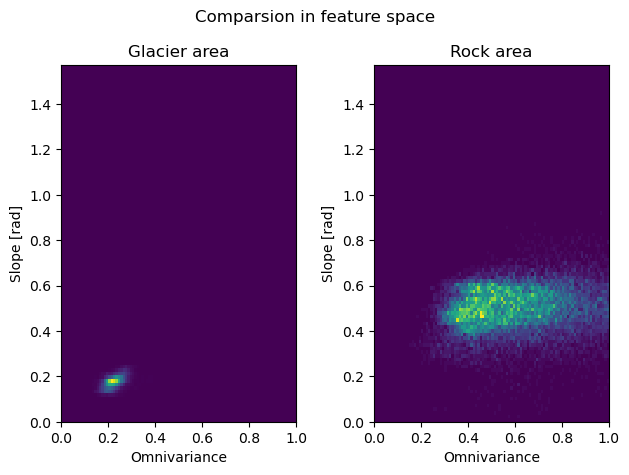

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparsion in feature space')
ax1.hist2d(feature_array[glacier_idx, 2], feature_array[glacier_idx, 4], bins=100, range=[[0, 1], [0, 3.14/2]])
ax1.set_xlabel('Omnivariance')
ax1.set_ylabel('Slope [rad]')
ax1.set_title('Glacier area')
ax2.hist2d(feature_array[rock_idx, 2], feature_array[rock_idx, 4], bins=100, range=[[0, 1], [0, 3.14/2]])
ax2.set_xlabel('Omnivariance')
ax2.set_ylabel('Slope [rad]')
ax2.set_title('Rock area')
plt.gcf().tight_layout()
plt.show()

For machine learning tasks the data is often split into a training and testing set. In earlier sections we explained how this approach reduces overfitting, hence improving the model when given unknown data. 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Create a "label" vector that contains 0 for all rock training points and 1 for all glacier training points
labelled_features = np.concatenate([feature_array[rock_idx, :], feature_array[glacier_idx, :]])
label = np.zeros(shape=(labelled_features.shape[0]))
label[len(rock_idx):] = 1 # everything after the rock entries is glacier

# Split the dataset for train/test
X_train, X_test, y_train, y_test = train_test_split(labelled_features, label, test_size=0.8, random_state=42)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

# Try the linear SVM Classifier first:
linearSVM = SVC(kernel='linear')
linearSVM.fit(X_train, y_train)
scores = linearSVM.score(X_test, y_test)
print(f"Linear SVM: {scores}")

# Then try the rbf SVM Classifier. Uses a 3rd degree polynomial by default:
rbfSVM = SVC(kernel='rbf')
rbfSVM.fit(X_train, y_train)
scores = rbfSVM.score(X_test, y_test)
print(f"RBF SVM   : {scores}")



Linear SVM: 0.9979537464293562
RBF SVM   : 0.9989974730828389


In [ ]:
from sklearn.preprocessing import StandardScaler

# Train the scaler (i.e., estimate the transformation parameters from the training data)
scaler = StandardScaler()
scaler.fit(X_train)

# Then try the rbf SVM Classifier. Uses a 3rd degree polynomial by default:
rbfSVM = SVC(kernel='rbf')
rbfSVM.fit(scaler.transform(X_train), y_train)
scores = rbfSVM.score(scaler.transform(X_test), y_test)
full_result = rbfSVM.predict(scaler.transform(imp.transform(feature_array[::100])))
print(f"RBF SVM (scaled): {scores}")


RBF SVM (scaled): 0.9988738738738738


#### supervised classification
random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(scaler.transform(X_train), y_train)
scores = rfc.score(scaler.transform(X_test), y_test)
print(f"Random Forest (scaled): {scores}")


Random Forest (scaled): 0.9998077345638321


17.71% of the points are predicted as glacier.


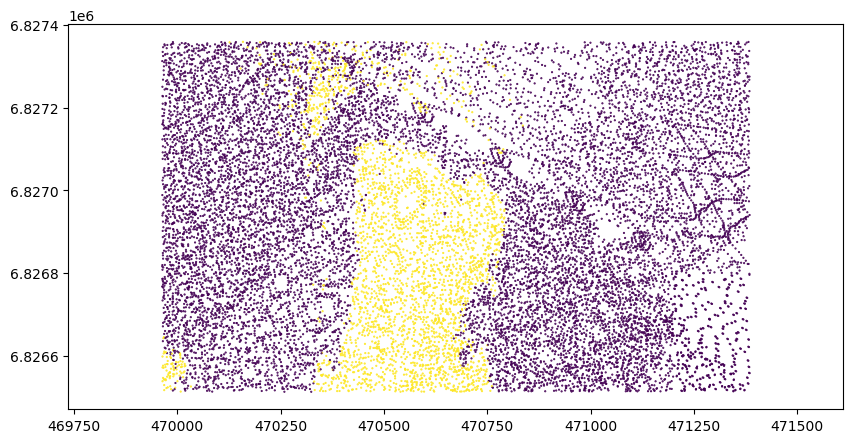

In [ ]:
full_result = rfc.predict(scaler.transform(imp.transform(feature_array[::100])))
print(f"{np.count_nonzero(full_result==1)/len(full_result)*100.:.2f}% of the points are predicted as glacier.")
plt.figure(figsize=(10,5))
plt.scatter(points_2009[::100][:, 0], points_2009[::100][:, 1], c=full_result, s=0.3)
plt.axis('equal')
plt.show()
#ps.init()
#pc_2009 = ps.register_point_cloud("point cloud 2009", points_2009[::100])
#pc_2009.add_scalar_quantity('Predicted class', full_result)
#ps.set_up_dir("z_up")
#ps.show()

#### unsupervised classification

/Users/Elaji/miniconda3/envs/open3d_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


17.71% of the points are predicted as 'Cluster A'.


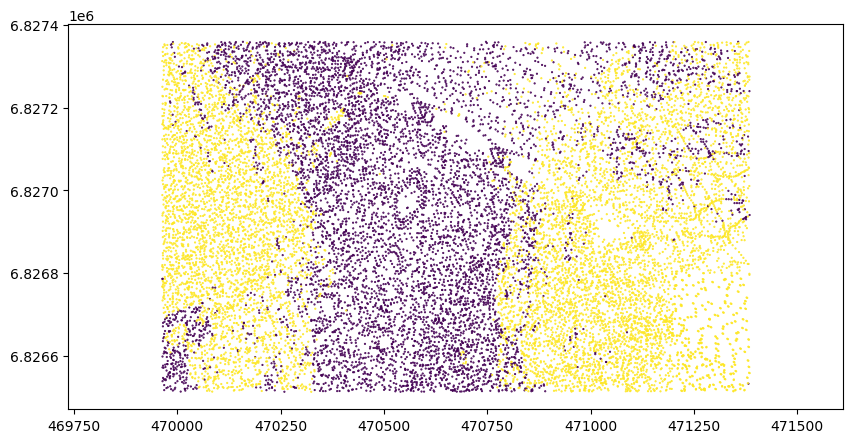

In [ ]:
from sklearn.cluster import KMeans

feature_subset = feature_array[::100][:, [2,4]]

imp_sub = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_sub = imp.fit(feature_subset)
scaler_sub = StandardScaler()
scaler_sub.fit(feature_subset)

km = KMeans(n_clusters=2)

km.fit(scaler_sub.transform(imp_sub.transform(feature_subset)))
predicted_clusters = km.labels_

print(f"{np.count_nonzero(full_result==1)/len(full_result)*100.:.2f}% of the points are predicted as 'Cluster A'.")
plt.figure(figsize=(10,5))
plt.scatter(points_2009[::100][:, 0], points_2009[::100][:, 1], c=predicted_clusters, s=0.3)
plt.axis('equal')
plt.show()



## references
* Weinmann, M., Jutzi, B., Hinz, S., & Mallet, C. (2015). Semantic point cloud interpretation based on optimal neighborhoods, relevant features and efficient classifiers. ISPRS Journal of Photogrammetry and Remote Sensing, 105, pp. 286-304. doi: [10.1016/j.isprsjprs.2015.01.016](https://doi.org/10.1016/j.isprsjprs.2015.01.016).
* Hughes, G. F., 1968. On the mean accuracy of statistical pattern recognizers. IEEE Transactions on Information Theory 14(1), pp. 55–63. ieee: [On the mean accuracy of statistical pattern recognizers](https://ieeexplore.ieee.org/document/1054102).
* Blomley, R., Jutzi, B. and Weinmann, M., 2016. Classification of air-
borne laser scanning data using geometric multi-scale features and dif-
ferent neighbourhood types. In: ISPRS Annals of the Photogrammetry,
Remote Sensing and Spatial Information Sciences, Prague, Czech Repub-
lic, Vol. III-3, pp. 169–176. doi: [isprs-annals-III-3-169-2016](https://isprs-annals.copernicus.org/articles/III-3/169/2016/isprs-annals-III-3-169-2016.pdf).
* Christopher D. Manning, Prabhakar Raghavan, Hinrich Schütze (2009). [Information retrieval](https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf).
* E-learning course on Time Series Analysis in Remote Sensing for Understanding Human-Environment Interactions (E-TRAINEE). [website](https://3dgeo-heidelberg.github.io/etrainee/index.html).
* [scikit-learn](https://scikit-learn.org).
* Lee, Seungjae and Lim, Hyungtae and Myung, Hyun 2022. Patchwork++: Fast and robust ground segmentation solving partial under-segmentation using 3D point cloud. Proc. IEEE/RSJ Int. Conf. Intell. Robots Syst. 13276-13283 arxiv: [2207.11919](https://arxiv.org/abs/2207.11919).
* [Anup Bhande, 2018](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76).
* Weinmann, M. (2019), Semantic Segmentation of Dense Point Clouds [PowerPoint slides]. Karlsruhe Institute of Technology. [link](http://www.eurosdr.net/sites/default/files/images/inline/05-2019-12-04_presentation_pcp_workshop_weinmann.pdf).
* [specification](https://www.ogc.org/standard/las/).
* [arcgis](https://desktop.arcgis.com/en/arcmap/latest/manage-data/las-dataset/lidar-point-classification.html). 
* [G-LiHT](https://glihtdata.gsfc.nasa.gov/).
* [laspy](https://laspy.readthedocs.io/en/latest/complete_tutorial.html).
* [thinkautomonous](https://www.thinkautonomous.ai/blog/point-cloud-registration).
